### Sequential API, Functional API

#### Sequential API
- Sequential API는 간단한 모델을 구현하기에 적합하고 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단하다.
- Sequential API는 단일 입력 및 출력만 있으므로 레이어를 공유하거나 여러 입력 또는 출력을 가질 수 있는 모델을 생성할 수 없다.

#### Functional API
- Functional API는 Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있다.
- 여러 개의 입력(multi-input) 및 출력(multi-output)을 가진 모델을 구현하거나,  
층 간의 연결이나 연산을 하는 모델을 구현할 때에는 Functional API를 사용해야 한다.

<img src="./images/functional_api.png" width="400" style="margin-left: 0">


##### Sequential API

In [91]:
# pip install tensorflow
# conda install -c conda-forge wrapt

In [92]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [93]:
import numpy as np

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)
    
    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [94]:
INPUT_SIZE = 28

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

# 전부 Dense layer라고 부른다.
# 학습할 데이터 많으면 neuron의 개수를 더 많이 지정(예, 64, 128 등)하고 은닉층(hidden layer)수를 더 늘려도 되고,
# 학습할 데이터가 적으면 neuron 수와 은닉층 수를 줄이는 것이 좋다.
model = Sequential([
#     전체 28 * 28(784)개의 feature로 flatten 진행
#     첫 번째 Input layer
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
#     두 번째 hidden layer
    Dense(64, activation='relu'),
#      세 번째 hidden layer
    Dense(128, activation='relu'),
#     네 번째 output layer
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                50240     
                                                                 
 dense_22 (Dense)            (None, 128)               8320      
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59850 (233.79 KB)
Trainable params: 59850 (233.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [96]:
from tensorflow.keras.utils import to_categorical

train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

(60000, 10) (10000, 10)


In [97]:
train_images.shape

(60000, 28, 28)

In [98]:
history = model.fit(x=train_images, y=train_oh_targets, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5008 - accuracy: 0.8215
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3671 - accuracy: 0.8657
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3336 - accuracy: 0.8770
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8837
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2950 - accuracy: 0.8897
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2805 - accuracy: 0.8949
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2702 - accuracy: 0.8991
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2574 - accuracy: 0.9033
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2484 - accuracy: 0.9060
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [99]:
print(history.history['loss'])
print("=" * 80)
print(history.history['accuracy'])

[0.5008272528648376, 0.3671317398548126, 0.3336018919944763, 0.3132123649120331, 0.2949954867362976, 0.28048962354660034, 0.27015233039855957, 0.25744757056236267, 0.24844102561473846, 0.23872973024845123, 0.23076513409614563, 0.2257712334394455, 0.2166418731212616, 0.21277333796024323, 0.20709621906280518, 0.19967563450336456, 0.1942806839942932, 0.19191491603851318, 0.18564413487911224, 0.18158118426799774]
[0.821483314037323, 0.8656833171844482, 0.8769833445549011, 0.8836833238601685, 0.8896999955177307, 0.8949166536331177, 0.8991000056266785, 0.9032833576202393, 0.9059666395187378, 0.9096666574478149, 0.9125999808311462, 0.914816677570343, 0.9176499843597412, 0.9195333123207092, 0.9211166501045227, 0.9235666394233704, 0.9262666702270508, 0.9257333278656006, 0.9289166927337646, 0.9304333329200745]


In [100]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))
print('predicted target value:', pred)

1/1 [==============================] - 0s 52ms/step
softmax output: [[1.7752725e-05 3.5553780e-09 9.9473978e-11 1.4827333e-08 5.8519051e-10
  1.3724649e-06 6.3483823e-09 4.3022055e-03 1.7856648e-08 9.9567872e-01]]
predicted target value: 9


Text(0.5, 1.0, '9. Ankle boot')

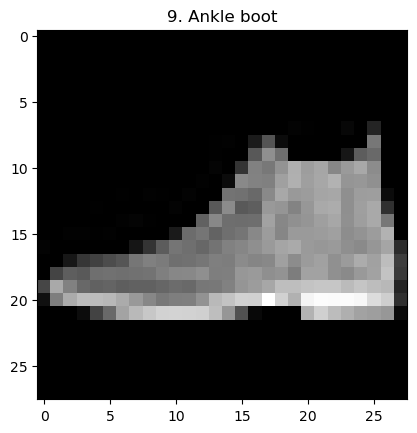

In [101]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(test_images[0], cmap='gray')
plt.title(str(int(test_targets[0])) + '. ' + class_names[int(test_targets[0])])

In [102]:
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8828


[0.3751051723957062, 0.8827999830245972]

##### Validation Data
- 훈련 데이터를 잘 맞추는 모델이 아니라, 학습에 사용하지 않은 테스트 데이터를 얼마나 잘 맞추는지가 목적이다.
- 훈련 데이터로 모델을 만들고 검증 데이터로 성능을 평가한다.
- 성능이 만족스럽다면, 해당 모델에 훈련 데이터와 검증 데이터를 합쳐서 학습 시킨 후 테스트 데이터를 넣어 확인한다.

<img src="./images/validation.jpg" width="500" style="margin-left: 0">

In [103]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)
    
    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

In [104]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_train_images, validation_images, train_train_targets, validation_targets = train_test_split(train_images, train_targets, test_size=0.2, stratify=train_targets, random_state=124)
print(train_train_images.shape, train_train_targets.shape, validation_images.shape, validation_targets.shape)

train_train_oh_targets = to_categorical(train_train_targets)
validation_oh_targets = to_categorical(validation_targets)

print(train_train_oh_targets.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000,) (12000, 28, 28) (12000,)
(48000, 10) (12000, 10)


In [105]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [106]:
history = model.fit(x=train_train_images, y=train_train_oh_targets, batch_size=32, validation_data=(validation_images, validation_oh_targets), epochs=20, verbose=2)

Epoch 1/20
1500/1500 - 3s - loss: 0.5228 - acc: 0.8131 - val_loss: 0.3979 - val_acc: 0.8525 - 3s/epoch - 2ms/step
Epoch 2/20
1500/1500 - 2s - loss: 0.3810 - acc: 0.8612 - val_loss: 0.3900 - val_acc: 0.8590 - 2s/epoch - 1ms/step
Epoch 3/20
1500/1500 - 2s - loss: 0.3457 - acc: 0.8723 - val_loss: 0.3756 - val_acc: 0.8631 - 2s/epoch - 1ms/step
Epoch 4/20
1500/1500 - 2s - loss: 0.3214 - acc: 0.8836 - val_loss: 0.3466 - val_acc: 0.8758 - 2s/epoch - 1ms/step
Epoch 5/20
1500/1500 - 2s - loss: 0.3030 - acc: 0.8890 - val_loss: 0.3381 - val_acc: 0.8767 - 2s/epoch - 1ms/step
Epoch 6/20
1500/1500 - 2s - loss: 0.2905 - acc: 0.8926 - val_loss: 0.3247 - val_acc: 0.8777 - 2s/epoch - 1ms/step
Epoch 7/20
1500/1500 - 2s - loss: 0.2781 - acc: 0.8962 - val_loss: 0.3172 - val_acc: 0.8870 - 2s/epoch - 1ms/step
Epoch 8/20
1500/1500 - 2s - loss: 0.2666 - acc: 0.9007 - val_loss: 0.3229 - val_acc: 0.8845 - 2s/epoch - 1ms/step
Epoch 9/20
1500/1500 - 2s - loss: 0.2570 - acc: 0.9030 - val_loss: 0.3073 - val_acc: 0.8

In [107]:
print(history.history['loss'])
print("=" * 80)
print(history.history['acc'])
print("=" * 80)
print(history.history['val_loss'])
print("=" * 80)
print(history.history['val_acc'])

[0.5228098630905151, 0.38103777170181274, 0.34574276208877563, 0.32140815258026123, 0.3029909133911133, 0.29049327969551086, 0.27811968326568604, 0.26663005352020264, 0.2569856643676758, 0.24699245393276215, 0.2373528629541397, 0.23192907869815826, 0.2229238897562027, 0.2186550348997116, 0.21262003481388092, 0.2053404301404953, 0.20102474093437195, 0.19361437857151031, 0.1892336905002594, 0.18262284994125366]
[0.8131250143051147, 0.8611666560173035, 0.8722916841506958, 0.8836458325386047, 0.8889583349227905, 0.8925833106040955, 0.8962291479110718, 0.9006875157356262, 0.9029791951179504, 0.9078958630561829, 0.910895824432373, 0.9117916822433472, 0.9164999723434448, 0.9178749918937683, 0.9179166555404663, 0.9225416779518127, 0.9224583506584167, 0.926604151725769, 0.9274166822433472, 0.9313333630561829]
[0.39790043234825134, 0.38998550176620483, 0.3755967319011688, 0.3466331660747528, 0.33806663751602173, 0.32473042607307434, 0.3172329068183899, 0.32294347882270813, 0.30733275413513184, 0

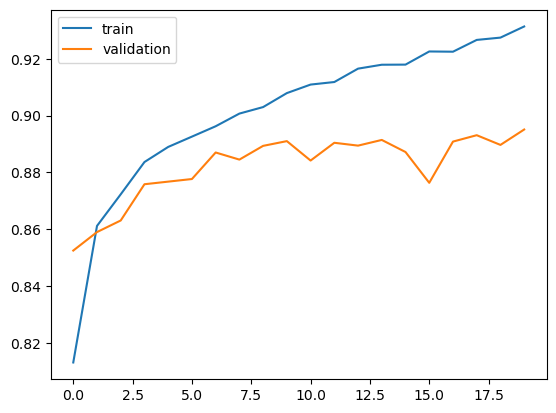

In [108]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

In [109]:
pred_proba = model.predict(np.expand_dims(test_images[8], axis=0))
print('softmax output: ', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))
print('predicted target value: ', pred)

1/1 [==============================] - 0s 50ms/step
softmax output:  [[3.1856484e-10 1.7202494e-22 3.3867947e-13 2.0621325e-13 2.3461651e-17
  1.0000000e+00 5.9894091e-16 3.7674321e-14 7.5356584e-14 3.5585305e-16]]
predicted target value:  5


Text(0.5, 1.0, '5. Sandal')

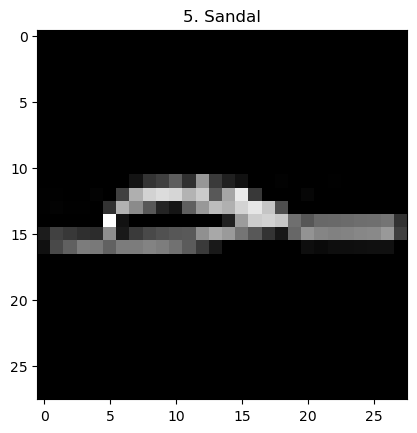

In [110]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(test_images[8], cmap='gray')
plt.title(str(int(test_targets[8])) + '. ' + class_names[int(test_targets[8])])

In [111]:
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 [==============================] - 1s 1ms/step - loss: 0.3684 - acc: 0.8893


[0.36842113733291626, 0.8892999887466431]

##### Functional API

In [112]:
class Test:
    def __call__(self, data):
        return data + 10

print(Test()(20))

30


In [113]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    return model

In [114]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)
    
    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)
    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)
    
    train_train_images, validation_images, train_train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)
    
    return (train_train_images, train_train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [115]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

(train_train_images, train_train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_train_images.shape, train_train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [116]:
from tensorflow.keras.optimizers import Adam

model = create_model()
model.summary()

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                50240     
                                                                 
 dense_28 (Dense)            (None, 128)               8320      
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59850 (233.79 KB)
Trainable params: 59850 (233.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
history = model.fit(
    x=train_train_images, 
    y=train_train_oh_targets, 
    batch_size=64, 
    epochs=20, 
    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.5540 - acc: 0.8019 - val_loss: 0.4332 - val_acc: 0.8441
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3919 - acc: 0.8591 - val_loss: 0.3891 - val_acc: 0.8560
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3536 - acc: 0.8716 - val_loss: 0.3556 - val_acc: 0.8700
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3288 - acc: 0.8789 - val_loss: 0.3338 - val_acc: 0.8773
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3093 - acc: 0.8865 - val_loss: 0.3588 - val_acc: 0.8692
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2938 - acc: 0.8916 - val_loss: 0.3328 - val_acc: 0.8775
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2841 - acc: 0.8944 - val_loss: 0.3331 - val_acc: 0.8807
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.

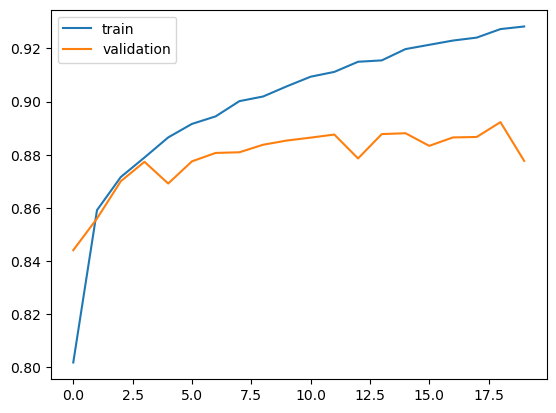

In [118]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()

show_history(history)

In [121]:
pred_proba = model.predict(np.expand_dims(test_images[124], axis=0))
print('softmax output: ', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))
print('predicted target value: ', pred)

1/1 [==============================] - 0s 30ms/step
softmax output:  [[2.8382384e-03 1.3250124e-07 4.8619320e-04 9.9617720e-01 2.3164761e-05
  1.3443002e-11 4.2606657e-04 7.1612292e-14 4.9007489e-05 1.9795545e-09]]
predicted target value:  3


Text(0.5, 1.0, '3. Dress')

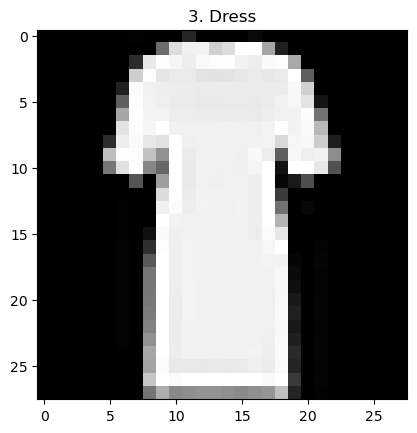

In [120]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(test_images[124], cmap='gray')
plt.title(str(int(test_targets[124])) + '. ' + class_names[int(test_targets[124])])

In [122]:
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 [==============================] - 0s 1ms/step - loss: 0.3958 - acc: 0.8748


[0.39579224586486816, 0.8748000264167786]